In [1]:
# Standard library imports
import warnings # For warning handling

# Third-party imports
import pandas as pd # for data manipulation and analysis, CSV file I/O
import numpy as np # For numerical operations and mathematical functions
import matplotlib.pyplot as plt # For data visualization
import seaborn as sns # For statistical graphics
from sklearn.model_selection import train_test_split # For data splitting (Training & Testing) in machine learning
from sklearn.preprocessing import MinMaxScaler, StandardScaler # For feature standardization & Normalization
from sklearn.metrics import accuracy_score, classification_report # For model evaluation
from termcolor import colored # For colored text printing

# For warning handling
warnings.filterwarnings('ignore') # For ignoring warnings

# Print a success message in green color
print(colored("THE REQUIRED LIBRARIES WERE SUCCESSFULLY IMPORTED...", "green", attrs=['reverse']))

THE REQUIRED LIBRARIES WERE SUCCESSFULLY IMPORTED...


In [4]:
# Read the CSV file and save it in "loan_train" variable

loan_train = pd.read_csv('train.csv', encoding='latin')

In [5]:
# Displaying the first 7 rows.
loan_train_rows = loan_train.head() 

print(colored('As you can see, the first 5 rows in the dataset:\n', 'green', attrs=['reverse']))

# Iterate over each row in the loan_train_rows DataFrame
for index, row in loan_train_rows.iterrows():
    # Print the index label of the current row, "index + 1" start with 1 not 0 
    print(colored(f"Row {index + 1}:", "white", attrs=['reverse']))
    
    # Print the content of the current row
    print(row)
    
    # Print a separator line
    print("--------------------------------------")


# .iterrows() function:
# Returns: (index, data|row|series)
#     Index: the index of the row.
#     Data: the data of the row as a series.
# Note: The column names will also be returned, in addition to the specified rows.

As you can see, the first 5 rows in the dataset:

Row 1:
Loan_ID              LP001002
Gender                   Male
Married                    No
Dependents                  0
Education            Graduate
Self_Employed              No
ApplicantIncome          5849
CoapplicantIncome         0.0
LoanAmount                NaN
Loan_Amount_Term        360.0
Credit_History            1.0
Property_Area           Urban
Loan_Status                 Y
Name: 0, dtype: object
--------------------------------------
Row 2:
Loan_ID              LP001003
Gender                   Male
Married                   Yes
Dependents                  1
Education            Graduate
Self_Employed              No
ApplicantIncome          4583
CoapplicantIncome      1508.0
LoanAmount              128.0
Loan_Amount_Term        360.0
Credit_History            1.0
Property_Area           Rural
Loan_Status                 N
Name: 1, dtype: object
--------------------------------------
Row 3:
Loan_ID              LP00

In [6]:
# Show the shape of the dataset
print("The shape =", loan_train.shape)

# Dataset dimensions and statistics
num_rows, num_cols = loan_train.shape
num_features = num_cols - 1
num_data = num_rows * num_cols

# Print the information about the dataset
print(f"Number of Rows: {num_rows}")
print(f"Number of Columns: {num_cols}")
print(f"Number of Features: {num_features}")
print(f"Number of All Data: {num_data}")

The shape = (614, 13)
Number of Rows: 614
Number of Columns: 13
Number of Features: 12
Number of All Data: 7982


In [7]:
# Get basic information from dataset like "Column names", "Data types" and "Non-null values counts"
print(loan_train.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None


In [8]:
# Descriptive Statistics of Numeric Variables only.
loan_train.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.46,6109.04,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.25,2926.25,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.41,85.59,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.00,65.12,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.84,0.36,0.0,1.0,1.0,1.00,1.0


In [9]:
# Descriptive analysis of Categorical Variables only.
loan_train.describe(include=object)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


Gender
Male      489
Female    112
NaN        13
Name: count, dtype: int64


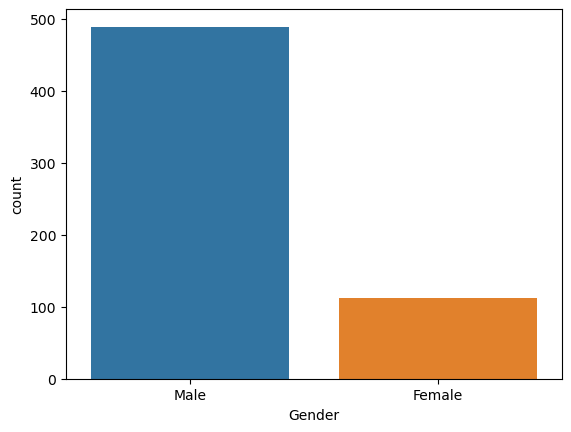

In [44]:
# "dropna" as False to count NaN (Not-a-Number) or Null values
GenderAnalysis = loan_train.Gender.value_counts(dropna=False)
print(GenderAnalysis)

# Bar Charts Analysis "For Gender feature"
sns.countplot(x="Gender", data=loan_train)
plt.show()

Married
Yes    398
No     213
NaN      3
Name: count, dtype: int64


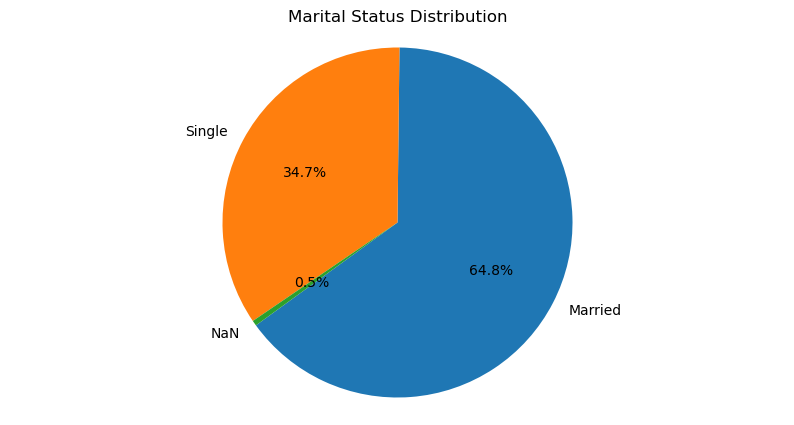

In [45]:
# "dropna" as False to count NaN values
MarriedAnalysis = loan_data.Married.value_counts(dropna=False)
print(MarriedAnalysis)

# Create a pie chart "For Married feature"
plt.figure(figsize=(10, 5)) # figure in inches

# labels by descending order
plt.pie(MarriedAnalysis, 
        labels=[("Married"),("Single"),("NaN")], 
        startangle=216, 
        autopct='%1.1f%%')

plt.axis('equal')  # Used to set the aspect ratio of the plot to be equal.
plt.title('Marital Status Distribution')
plt.show()

Dependents
0      345
1      102
2      101
3+      51
NaN     15
Name: count, dtype: int64


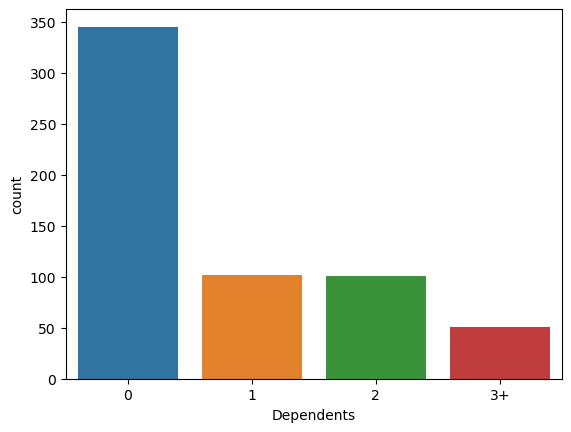

In [35]:
DependentsAnalysis = loan_train.Dependents.value_counts(dropna=False)
print(DependentsAnalysis)

# Bar Charts Analysis "For Dependents feature"
sns.countplot(x="Dependents", data=loan_train)
plt.show()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64


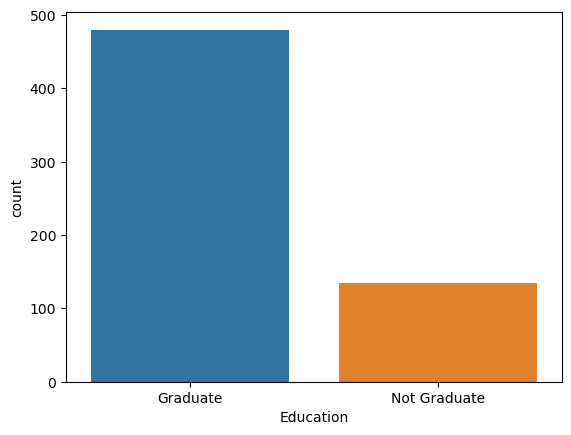

In [34]:
EducationAnalysis = loan_train.Education.value_counts(dropna=False)
print(EducationAnalysis)

# Bar Charts Analysis "For Education feature"
sns.countplot(x="Education", data=loan_train)
plt.show()

Self_Employed
No     500
Yes     82
NaN     32
Name: count, dtype: int64


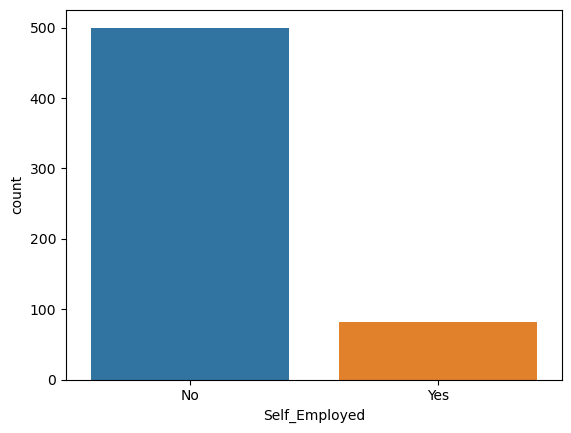

In [33]:
Self_EmployedAnalysis = loan_train.Self_Employed.value_counts(dropna=False)
print(Self_EmployedAnalysis)

# Bar Charts Analysis "For Self Employed feature"
sns.countplot(x="Self_Employed", data=loan_train)
plt.show()

The Average Income: 5403.46 
The ratio of people with income above average to below average: 40.18 
Number of people income above the average: 176
Number of people income below the average: 438


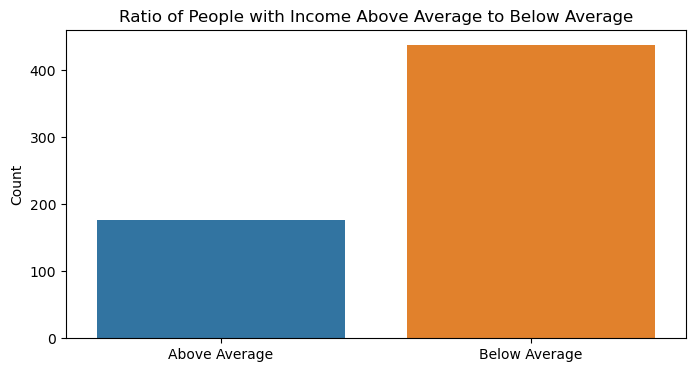

In [32]:
# Calculate the average income
average_income = loan_train['ApplicantIncome'].mean()
print(f"The Average Income: {average_income:.2f} ")

# Count incomes higher and lower than average
above_average_count = (loan_train['ApplicantIncome'] > average_income).sum()
below_average_count = (loan_train['ApplicantIncome'] <= average_income).sum()

# Calculate ratio and print the results
ratio = above_average_count / below_average_count
print(f"The ratio of people with income above average to below average: {ratio*100:.2f} ")
print(f"Number of people income above the average: {above_average_count}")
print(f"Number of people income below the average: {below_average_count}")

# Plot the ratio using Seaborn
plt.figure(figsize=(8, 4))
sns.barplot(x=['Above Average', 'Below Average'], y=[above_average_count, below_average_count])
plt.title('Ratio of People with Income Above Average to Below Average')
plt.ylabel('Count')
plt.show()

Credit_History
1.0    475
0.0     89
NaN     50
Name: count, dtype: int64


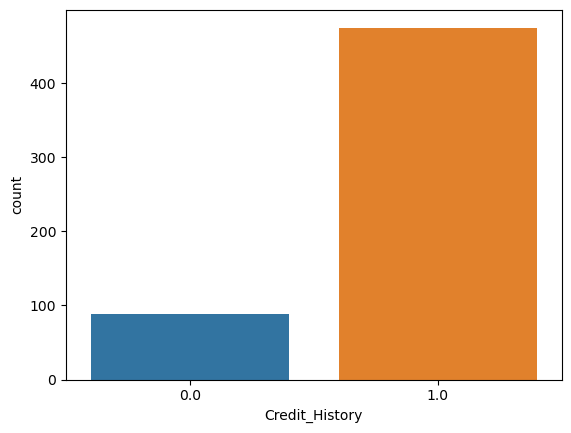

In [31]:
Credit_HistoryAnalysis = loan_train.Credit_History.value_counts(dropna=False)
print(Credit_HistoryAnalysis)

# Bar Charts Analysis "For Credit History feature"
sns.countplot(x="Credit_History", data=loan_train)
plt.show()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64


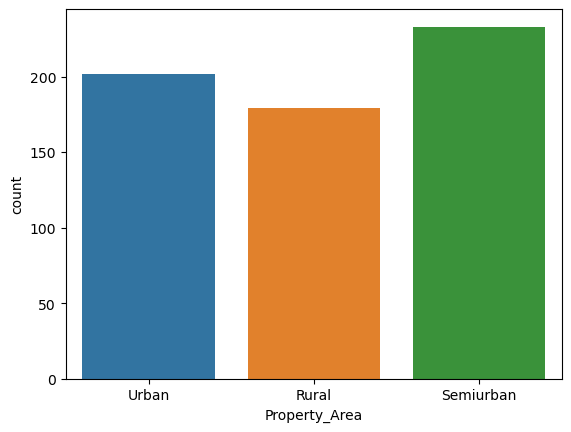

In [30]:
Property_AreaAnalysis = loan_train.Property_Area.value_counts(dropna=False)
print(Property_AreaAnalysis)

# Bar Charts Analysis "For Property Area feature"
sns.countplot(x="Property_Area", data=loan_train)
plt.show()

Loan_Status
Y    422
N    192
Name: count, dtype: int64


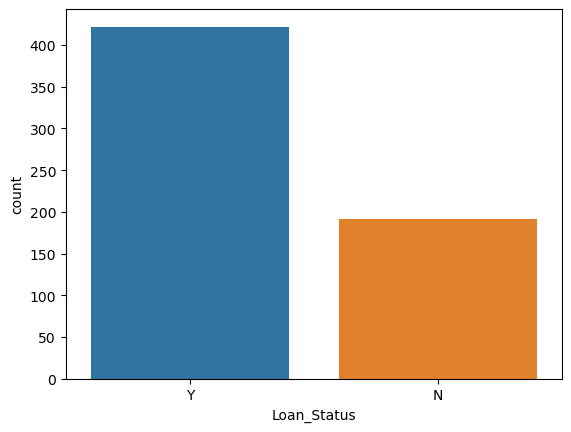

In [46]:
Loan_StatusAnalysis = loan_train.Loan_Status.value_counts(dropna=False)
print(Loan_StatusAnalysis)

# Bar Charts Analysis "For Loan Status column"
sns.countplot(x="Loan_Status", data=loan_train)
plt.show()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
NaN       14
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64


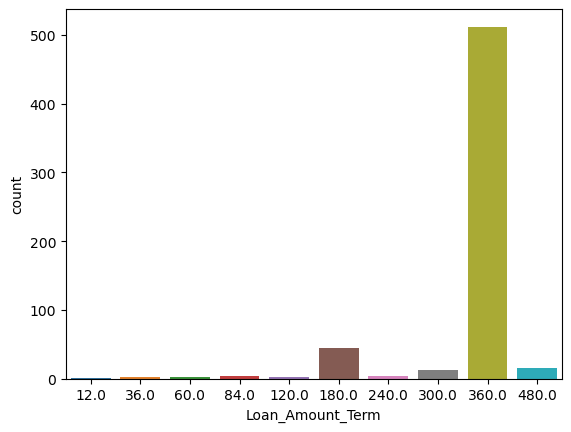

In [47]:
Loan_Amount_TermAnalysis = loan_train.Loan_Amount_Term.value_counts(dropna=False)
print(Loan_Amount_TermAnalysis)

# Bar Charts Analysis "For Loan amount term feature"
sns.countplot(x="Loan_Amount_Term", data=loan_train)
plt.show()

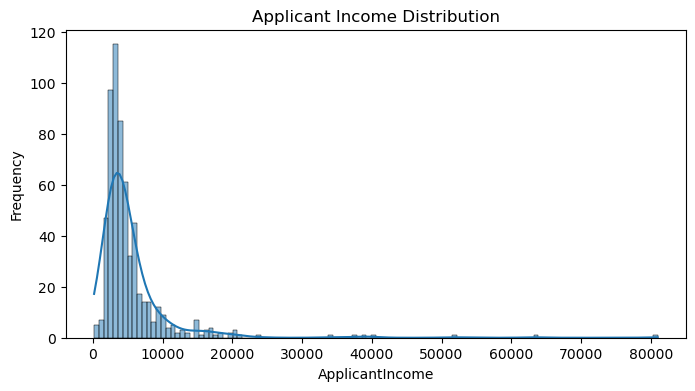

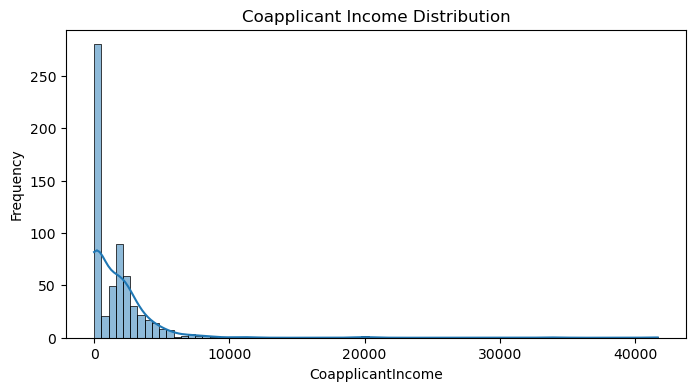

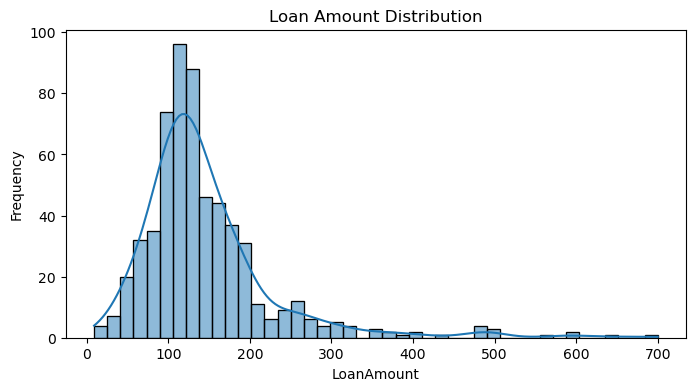

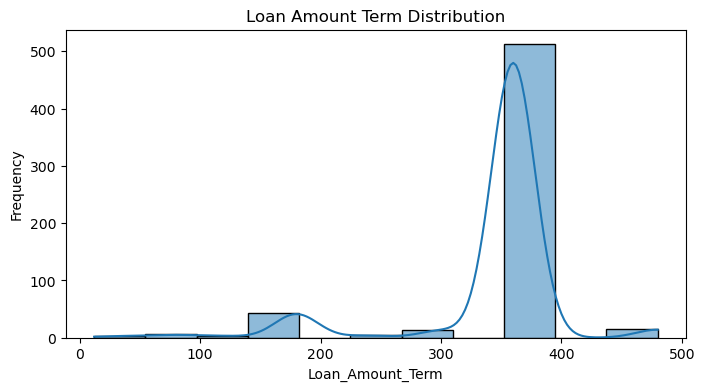

In [48]:
# Histogram distribution for numerical values "This enables us to see if there are outliers or not"

# create a function for plot distribution 
def plot_distribution(column, title):
    plt.figure(figsize=(8, 4))
    sns.histplot(data=loan_train, x=column, kde=True)
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Plot distribution for each numerical column
plot_distribution("ApplicantIncome", "Applicant Income Distribution")
plot_distribution("CoapplicantIncome", "Coapplicant Income Distribution")
plot_distribution("LoanAmount", "Loan Amount Distribution")
plot_distribution("Loan_Amount_Term", "Loan Amount Term Distribution")

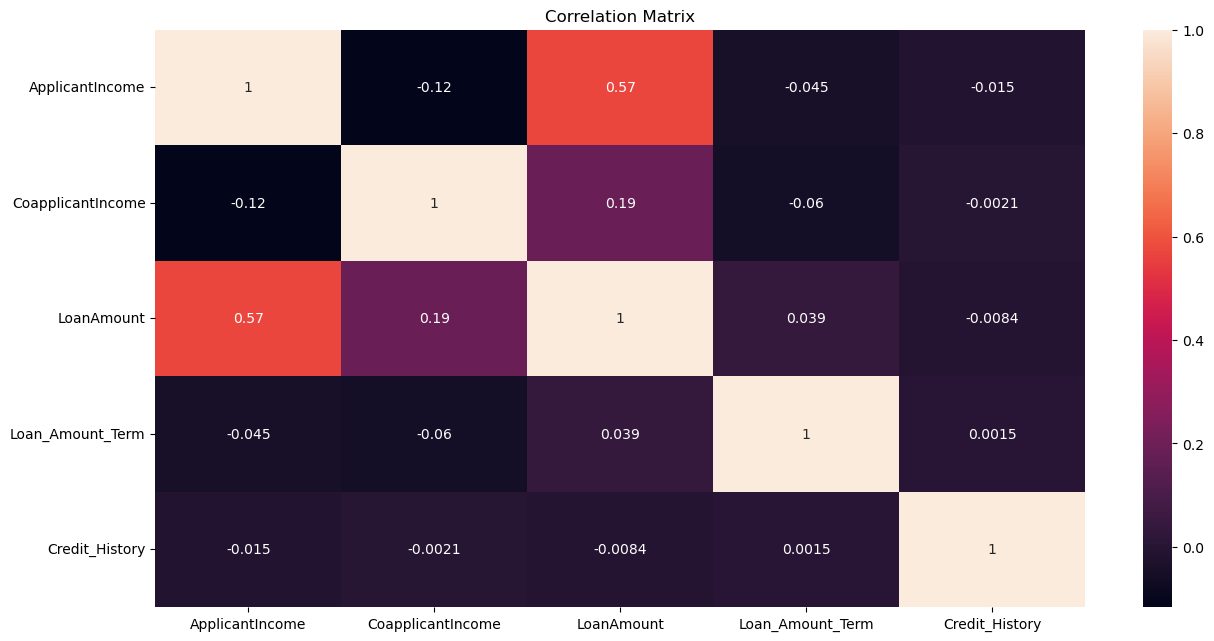

In [51]:
# Correlation matrix using heatmap
# Calculates the correlation coefficients between all pairs of numerical variables in the dataset
correlation_matrix = loan_train.corr(numeric_only=True)

# Create a heatmap figure with specified size (in inches)
plt.figure(figsize=(15, 7.5))

# Generate a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True)

# Add a title to the plot
plt.title('Correlation Matrix')

# Display the heatmap
plt.show()

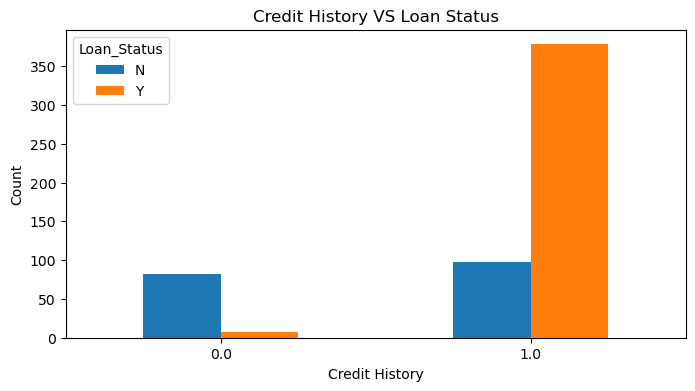

In [52]:
# Create a cross-tabulation of 'Credit History' and 'Loan status' variables
pd.crosstab(loan_train.Credit_History, loan_train.Loan_Status).plot(kind="bar", figsize=(8, 4))

# Add a title to the plot
plt.title('Credit History VS Loan Status')

# Label the x-axis
plt.xlabel('Credit History')

# Label the y-axis
plt.ylabel('Count')

# Rotate the x-axis labels to avoid overlap
plt.xticks(rotation=0)

# Display the plot
plt.show()

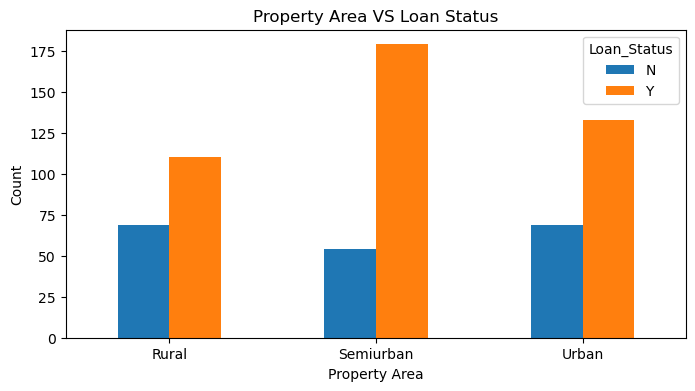

In [53]:
# Create a cross-tabulation of 'Property Area' and 'Loan Status' variables
pd.crosstab(loan_train.Property_Area, loan_train.Loan_Status).plot(kind="bar", figsize=(8, 4))

# Add a title to the plot
plt.title('Property Area VS Loan Status')

# Label the x-axis
plt.xlabel('Property Area')

# Label the y-axis
plt.ylabel('Count')

# Rotate the x-axis labels to avoid overlap
plt.xticks(rotation=0)

# Display the plot
plt.show()

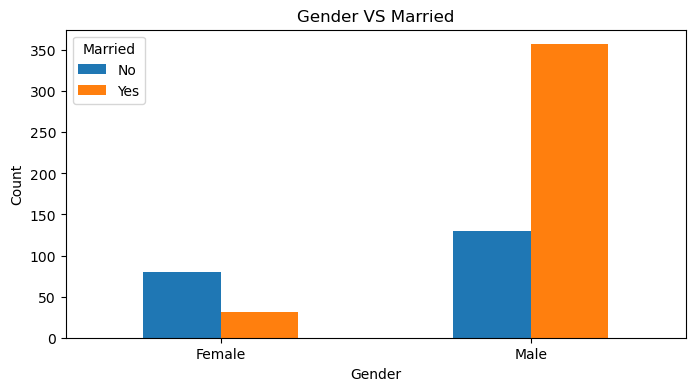

In [54]:
# Create a cross-tabulation of 'Gender' and 'Married' variables
pd.crosstab(loan_train.Gender, loan_train.Married).plot(kind="bar", figsize=(8, 4))

# Add a title to the plot
plt.title('Gender VS Married')

# Label the x-axis
plt.xlabel('Gender')

# Label the y-axis
plt.ylabel('Count')

# Rotate the x-axis labels to avoid overlap
plt.xticks(rotation=0)

# Display the plot
plt.show()

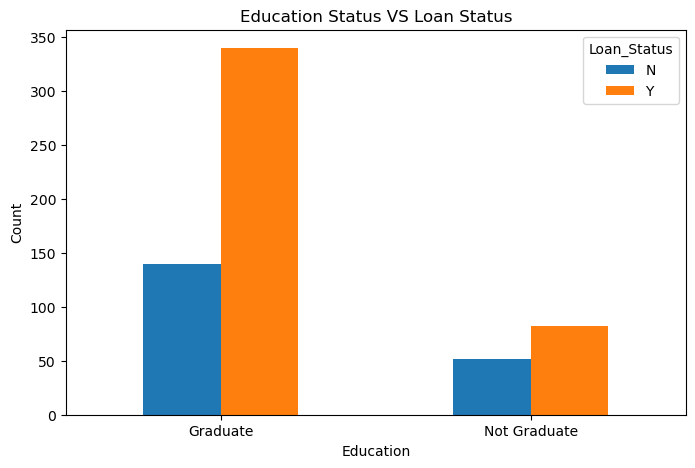

In [56]:
# Create a cross-tabulation of 'Gender' and 'Loan Status' variables
pd.crosstab(loan_train.Education, loan_train.Loan_Status).plot(kind="bar", figsize=(8, 5))

# Add a title to the plot
plt.title('Education Status VS Loan Status')

# Label the x-axis
plt.xlabel('Education')

# Label the y-axis
plt.ylabel('Count')

# Rotate the x-axis labels to avoid overlap
plt.xticks(rotation=0)

# Display the plot
plt.show()

In [57]:
# Dropping Loan_ID column
loan_train.drop(['Loan_ID'], axis = 1 , inplace = True)

print(loan_train.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB
None


In [59]:
# Check for missing values
null_counts = loan_train.isnull().sum()

print(null_counts)

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [60]:
# Fill the missing values for numerical data, .fillna = fill (NaN) values
'''
## 1- Mean Imputation:
loan_train["Credit_History"] = loan_train["Credit_History"].fillna(loan_train["Credit_History"].mean())

## 1- Median Imputation:
loan_train["Credit_History"] = loan_train["Credit_History"].fillna(loan_train["Credit_History"].median())
'''

## 2- Mode Imputatoin:
# The best way fill in the Credit History is the mode (Most common valus)
# [0] This ensures that if there are multiple mode values, only the first one is selected.
loan_train["Credit_History"] = loan_train["Credit_History"].fillna(loan_train["Credit_History"].mode()[0])



# The best way fill in the Loan Amount is the Mean (The average).
loan_train["LoanAmount"] = loan_train["LoanAmount"].fillna(loan_train["LoanAmount"].mean())


# The best way fill in the Loan Amount Term is the mode (Most common valus)
loan_train["Loan_Amount_Term"] = loan_train["Loan_Amount_Term"].fillna(loan_train["Loan_Amount_Term"].mode()[0])


# Fill the missing values for categorical data.
loan_train["Gender"] = loan_train["Gender"].fillna(loan_train["Gender"].mode()[0])
loan_train["Married"] = loan_train["Married"].fillna(loan_train["Married"].mode()[0])
loan_train["Dependents"] = loan_train["Dependents"].fillna(loan_train["Dependents"].mode()[0])
loan_train["Self_Employed"] = loan_train["Self_Employed"].fillna(loan_train["Self_Employed"].mode()[0])


In [61]:
# Check for missing values after handling
null_counts = loan_train.isnull().sum()

# Display the number of null values after handling
print(null_counts)

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [62]:
# Converting categorical variables into dummy/indicator variables through a process called "one-hot" encoding
loan_train = pd.get_dummies(loan_train)

# Drop unneeded features
loan_train = loan_train.drop(['Gender_Female', 
                            'Married_No', 
                            'Education_Not Graduate',
                            'Self_Employed_No', 
                            'Loan_Status_N'], axis = 1) # axis = 1 for column

# Rename existing columns
newColunmsNames = {'Gender_Male': 'Gender', 
                   'Married_Yes': 'Married', 
                   'Education_Graduate': 'Education', 
                   'Self_Employed_Yes': 'Self_Employed',
                   'Loan_Status_Y': 'Loan_Status'}

# Assigning new columns names
loan_train.rename(columns=newColunmsNames, inplace=True)

# Display the columns names and shape of the transformed dataset
## Get the column names of the DataFrame
column_names = loan_train.columns.tolist()

## Print the column names in a readable format
print(colored("Column Names:", "blue",attrs=['reverse']))

for col in column_names:
    print(f"- {col}")
    
print("The shape =",loan_train.shape)
print("_______________________________________________")

# Display the first 5 rows of the transformed target variable
print(colored("Transformed Target Variable (Y):","blue", attrs=['reverse']))
print(loan_train['Loan_Status'].head())

Column Names:
- ApplicantIncome
- CoapplicantIncome
- LoanAmount
- Loan_Amount_Term
- Credit_History
- Gender
- Married
- Dependents_0
- Dependents_1
- Dependents_2
- Dependents_3+
- Education
- Self_Employed
- Property_Area_Rural
- Property_Area_Semiurban
- Property_Area_Urban
- Loan_Status
The shape = (614, 17)
_______________________________________________
Transformed Target Variable (Y):
0     True
1    False
2     True
3     True
4     True
Name: Loan_Status, dtype: bool


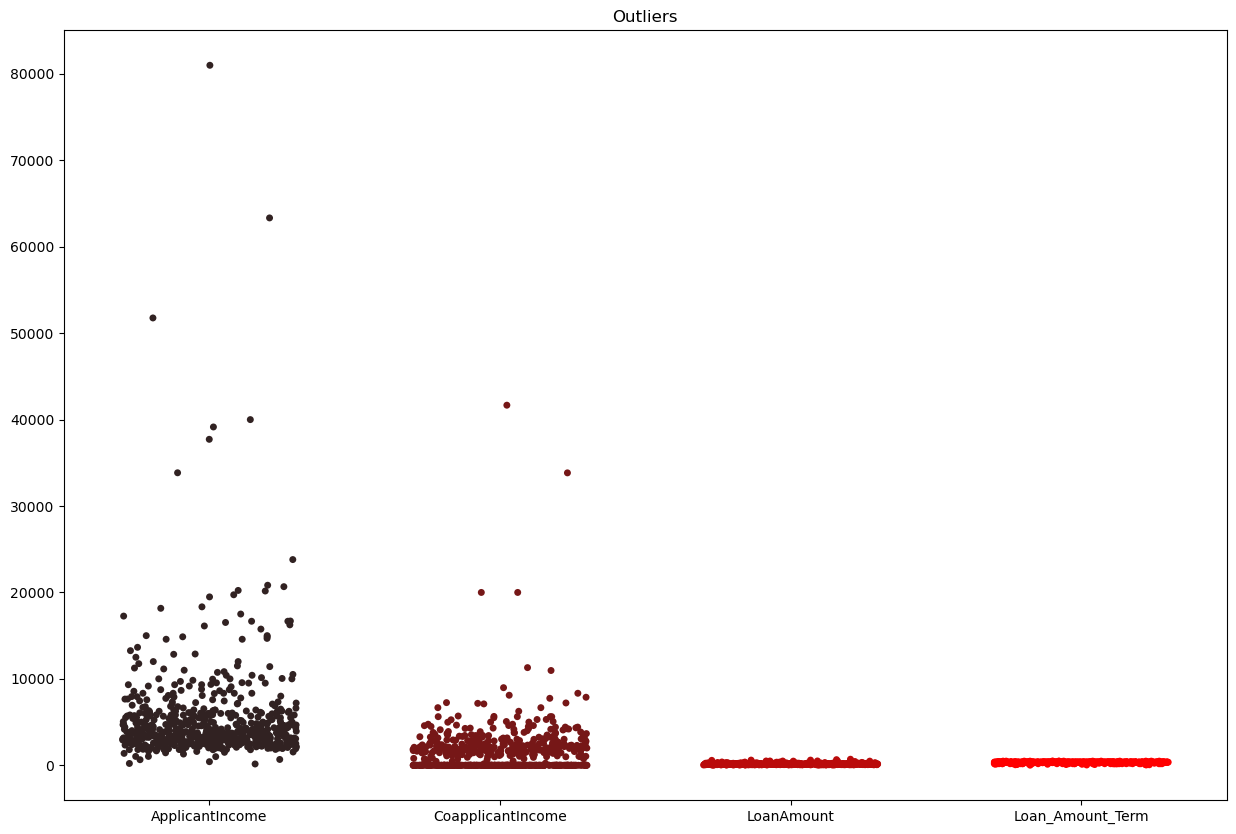

In [63]:
###Handling Outliers

# Set the figure size
plt.figure(figsize=(15, 10))

# Only variables that have outliers
outliersColumns = loan_train.get(["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"])

# Add outliers to the plot
sns.stripplot(data=outliersColumns, color="red", jitter=0.3, size=5)

# Set the axis labels and title
plt.title("Outliers")

# Show the plot
plt.show()

In [64]:
# Reassign new values to outliers

# IQR Scaling
Q1 = loan_train.astype(np.float32).quantile(0.25)
Q3 = loan_train.astype(np.float32).quantile(0.75)

# Calcuate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Removing Qutliers
loan_train = loan_train[~((loan_train < (Q1 - 1.5 * IQR)) |(loan_train > (Q3 + 1.5 * IQR))).any(axis=1)]

# printing shape
print(loan_train.shape)


(136, 17)


In [65]:
# Square Root Transformation - to normalized the distribution.
loan_train.ApplicantIncome = np.sqrt(loan_train.ApplicantIncome)
loan_train.CoapplicantIncome = np.sqrt(loan_train.CoapplicantIncome)
loan_train.LoanAmount = np.sqrt(loan_train.LoanAmount)

print(loan_train.shape)

(136, 17)


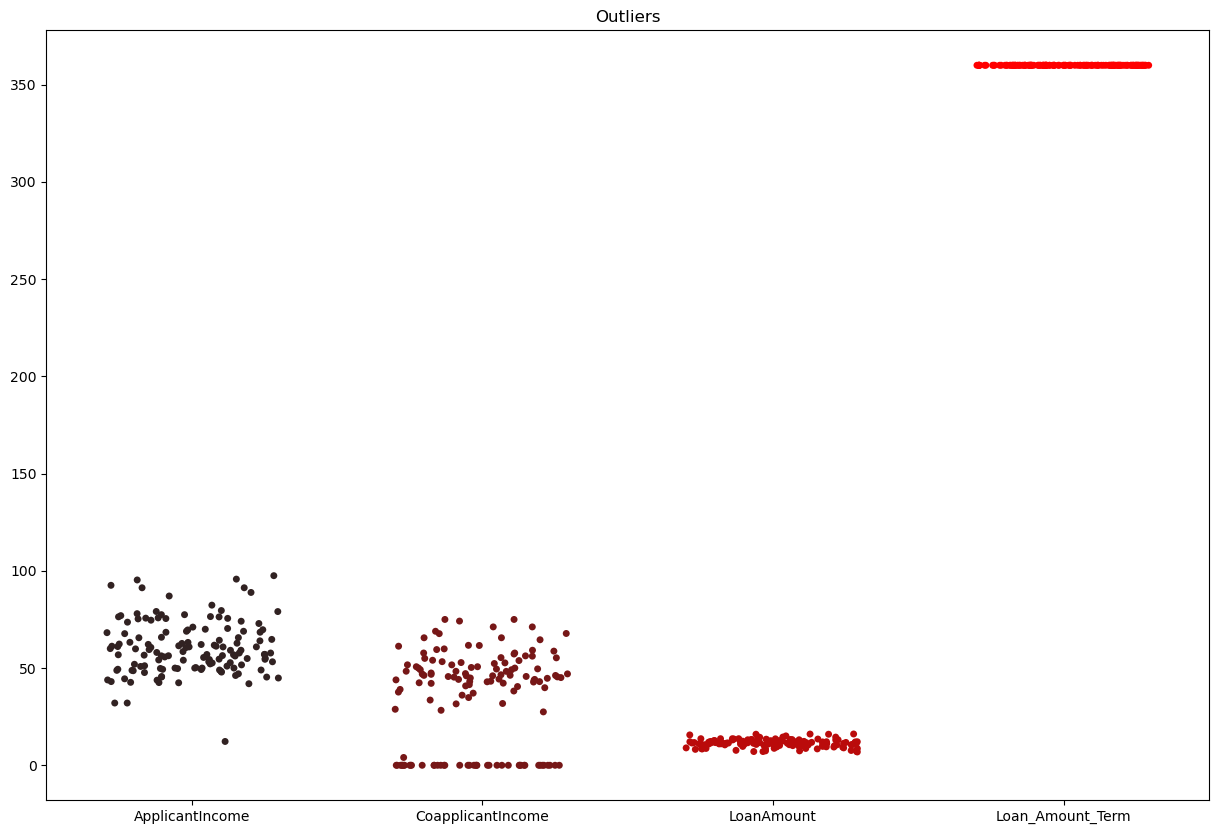

In [66]:
# Set the figure size
plt.figure(figsize=(15, 10))

# Only variables that have outliers
outliersColumns = loan_train.get(["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"])

# Add outliers to the plot
sns.stripplot(data=outliersColumns, color="red", jitter=0.3, size=5)

# Set the axis labels and title
plt.title("Outliers")

# Show the plot
plt.show()

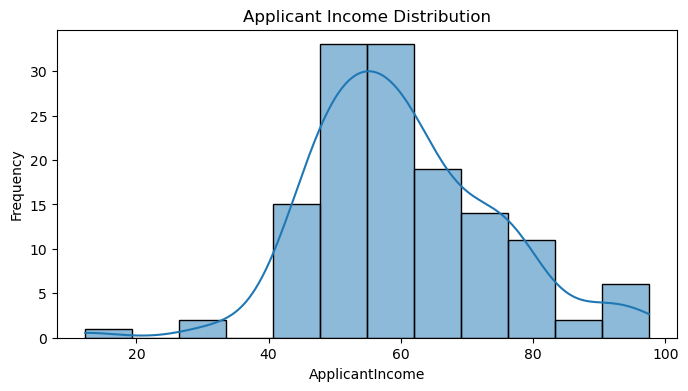

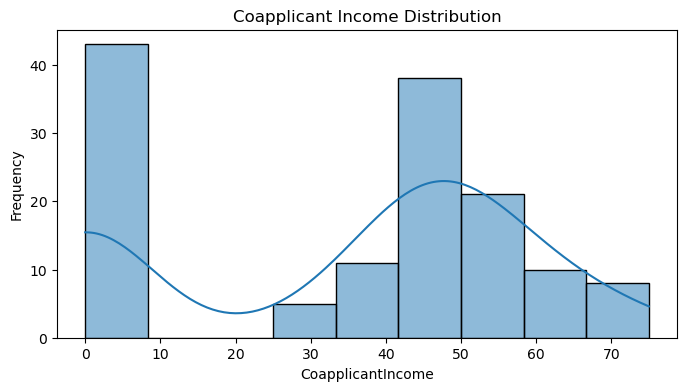

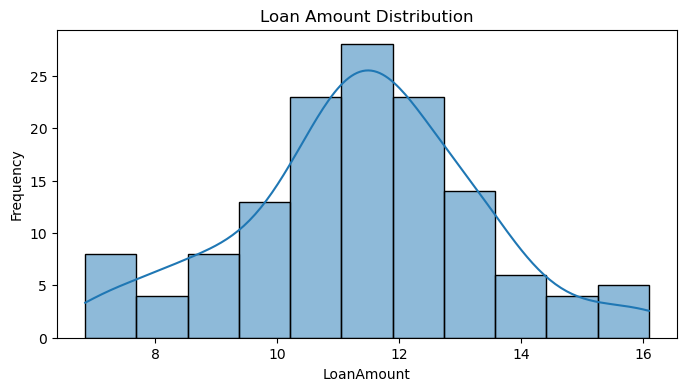

In [67]:
# Histogram distribution for numerical values

def plot_distribution(column, title):
    plt.figure(figsize=(8, 4))
    sns.histplot(data=loan_train, x=column, kde=True)
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Plot distribution for each numerical column
plot_distribution("ApplicantIncome", "Applicant Income Distribution")
plot_distribution("CoapplicantIncome", "Coapplicant Income Distribution")
plot_distribution("LoanAmount", "Loan Amount Distribution")

In [ ]:
### DATA PROCESSING 

In [70]:
## Splitting data into "Features" - "Target"
# Features "Inputs" (X)
X = loan_train.drop(columns=['Loan_Status'])

# Target variable "Outputs" (Y)
Y = loan_train['Loan_Status']

# Print the shapes of X and Y to verify the splitting
print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)

Shape of X: (136, 16)
Shape of Y: (136,)


In [71]:
# Rescale and normalize the features

# Min-Max Scaling (Rescaling)
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)


In [72]:
# Split the data into training and testing sets
# X: Features, Y: Target variable
# test_size=0.2 specifies that 20% of the data will be used for testing and 80% for training
# random_state=0 sets the random seed for reproducibility
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Print the shapes of the training and testing sets to verify the splitting
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)

Shape of X_train: (108, 16)
Shape of X_test: (28, 16)
Shape of Y_train: (108,)
Shape of Y_test: (28,)


In [73]:
X_train

array([[0.89888283, 0.57084732, 0.71020561, ..., 1.        , 0.        ,
        0.        ],
       [0.35395752, 0.46437533, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.3612302 , 0.71055534, 0.41367148, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.35519998, 0.57627154, 0.28482669, ..., 0.        , 0.        ,
        1.        ],
       [0.4351115 , 0.        , 0.19534901, ..., 0.        , 0.        ,
        1.        ],
       [0.65035676, 1.        , 0.98649492, ..., 0.        , 1.        ,
        0.        ]])

In [74]:
from sklearn.tree import DecisionTreeClassifier  # For Decision Tree Classifier Model
from sklearn.ensemble import RandomForestClassifier # For Random Forest Classifier Model
from sklearn.neighbors import KNeighborsClassifier # For K-Nearest Neighbors Model
from sklearn.naive_bayes import GaussianNB,BernoulliNB  # For Gaussian,Bernoulli Naive Bayes Classifier Model
from sklearn.linear_model import RidgeClassifierCV, LogisticRegression # For Ridge Classifier Cross-validated and Logistic Regression Models
from sklearn.svm import SVC  # For Support Vector Classifier Model
from sklearn.ensemble import GradientBoostingClassifier  # For Gradient Boosting Classifier Model

In [75]:
# Decision Tree Classifier Parameters
'''
sklearn.tree.DecisionTreeClassifier(*, criterion='gini', 
                                    splitter='best', max_depth=None, 
                                    min_samples_split=2, min_samples_leaf=1, 
                                    min_weight_fraction_leaf=0.0, max_features=None, 
                                    random_state=None, max_leaf_nodes=None, 
                                    min_impurity_decrease=0.0, class_weight=None, 
                                    ccp_alpha=0.0, monotonic_cst=None)
'''

# max_depth (The maximum depth of the tree "It is the number of layers of the longest branch of the tree")
# min_samples_split (The minimum number of samples required to split an internal node "2 by default")
# min_samples_leaf (The minimum number of samples required to be at a leaf node)
# max_features (The number of features to consider when looking for the best split)

# Initialize lists to store training and testing accuracies
scoreListDT_Train = []
scoreListDT_Test = []

# Iterate over different values of max_depth
for i in range(1, 20):
    # Iterate over different values of min_samples_leaf
    for j in range(1, 5):
        # Create a Decision Tree model with the different values of max_depth, min_samples_leaf, and fixed max_features
        Model1 = DecisionTreeClassifier(max_depth=i, min_samples_leaf=j, max_features=2)

        # Fit the model on the training data
        Model1.fit(X_train, Y_train)

        # Calculate and store the training accuracy
        scoreListDT_Train.append(Model1.score(X_train, Y_train))

        # Calculate and store the testing accuracy
        scoreListDT_Test.append(Model1.score(X_test, Y_test))

# Find the maximum accuracy for both training and testing
DT_Accuracy_Train = max(scoreListDT_Train) 
DT_Accuracy_Test = max(scoreListDT_Test)

# Print the best accuracies achieved
print(f"Decision Tree best accuracy (Training): {DT_Accuracy_Train*100:.2f}%")
print(f"Decision Tree best accuracy (Testing): {DT_Accuracy_Test*100:.2f}%")

# Print a success message indicating that the model has been trained successfully
print(colored("The Decision Tree model has been trained successfully","green", attrs=['reverse']))

Decision Tree best accuracy (Training): 100.00%
Decision Tree best accuracy (Testing): 96.43%
The Decision Tree model has been trained successfully


In [77]:
# Random Forest Classifier Parameters
'''
sklearn.ensemble.RandomForestClassifier(n_estimators=100, *, criterion='gini', 
                                        max_depth=None, min_samples_split=2, min_samples_leaf=1, 
                                        min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, 
                                        min_impurity_decrease=0.0, bootstrap=True, oob_score=False, 
                                        n_jobs=None, random_state=None, verbose=0, 
                                        warm_start=False, class_weight=None, ccp_alpha=0.0, 
                                        max_samples=None, monotonic_cst=None)
'''

# n_estimators (The number of trees in the forest)
# max_depth (The maximum depth of the tree.)
# random_state (Controls both the randomness of the bootstrapping of the samples used when building trees)

# Initialize lists to store training and testing accuracies
scoreListRF_Train = []
scoreListRF_Test = []

'''
max_dep      ----------> (1, 5),(1, 10) 
rand_state   ----------> (1, 35),(1, 50)
n_est        ----------> (1, 30),(1, 30)
'''

# Iterate over different values of max_depth
for max_dep in range(1, 10):
    # Iterate over different values of random_state
    for rand_state in range(1, 50):
        # Iterate over different values of n_estimators
        for n_est in range(1, 30):
            # Create a Random Forest model with the different values of max_depth, random_state, and n_estimators
            Model2 = RandomForestClassifier(n_estimators=n_est, random_state=rand_state, max_depth=max_dep)            
            
            # Fit the model on the training data
            Model2.fit(X_train, Y_train)
            
            # Calculate and store the training accuracy
            scoreListRF_Train.append(Model2.score(X_train, Y_train))
            
            # Calculate and store the testing accuracy
            scoreListRF_Test.append(Model2.score(X_test, Y_test))

# Find the maximum accuracy for both training and testing
RF_Accuracy_Train = max(scoreListRF_Train) 
RF_Accuracy_Test = max(scoreListRF_Test)

# Print the best accuracies achieved
print(f"Random Forest best accuracy (Training): {RF_Accuracy_Train*100:.2f}%")
print(f"Random Forest best accuracy (Testing): {RF_Accuracy_Test*100:.2f}%")

# Print a success message indicating that the model has been trained successfully
print(colored("The Random Forest model has been trained successfully","green", attrs=['reverse']))

Random Forest best accuracy (Training): 100.00%
Random Forest best accuracy (Testing): 96.43%
The Random Forest model has been trained successfully


In [78]:
# Gaussian Naive Bayes Parameters
'''
sklearn.naive_bayes.GaussianNB(*, priors=None, var_smoothing=1e-09)
'''

# var_smoothing (Portion of the largest variance of all features that is added to variances for calculation stability.)

# Initialize lists to store training and testing accuracies
scoreListGNB_Train = []
scoreListGNB_Test = []

# Iterate over different values of var_smoothing
for i in range(1, 9):
    # Create a Gaussion Naive Bayes Model with the different values of var_smoothing
    Model3_1 = GaussianNB(var_smoothing=10**(-i))

    # Fit the model on the training data
    Model3_1.fit(X_train, Y_train)
    
    # Calculate and store the training accuracy
    scoreListGNB_Train.append(Model3_1.score(X_train, Y_train))
    
    # Calculate and store the testing accuracy
    scoreListGNB_Test.append(Model3_1.score(X_test, Y_test))

# Find the maximum accuracy for both training and testing
GNB_Accuracy_Train = max(scoreListGNB_Train) 
GNB_Accuracy_Test = max(scoreListGNB_Test)

# Print the best accuracies achieved
print(f"Gaussian Naive Bayes best accuracy (Training): {GNB_Accuracy_Train*100:.2f}%")
print(f"Gaussian Naive Bayes best accuracy (Testing): {GNB_Accuracy_Test*100:.2f}%")

# Print a success message indicating that the model has been trained successfully
print(colored("The Gaussian Naive Bayes model has been trained successfully","green", attrs=['reverse']))

Gaussian Naive Bayes best accuracy (Training): 79.63%
Gaussian Naive Bayes best accuracy (Testing): 89.29%
The Gaussian Naive Bayes model has been trained successfully


In [79]:
# Bernoulli Naive Bayes Parameters
'''
sklearn.naive_bayes.BernoulliNB(*, alpha=1.0, force_alpha=True, binarize=0.0, fit_prior=True, class_prior=None)
'''

# alpha (Additive (Laplace/Lidstone) smoothing parameter)
# force_alpha (If False and alpha is close to zero, it's adjusted to 1e-10 to prevent numerical errors; otherwise, alpha stays unchanged.)
# binarize (Sets the threshold for converting sample features to binary values; if None, assumes the input is already binary.)

# Create a Bernoulli Naive Bayes Model
Model3_2= BernoulliNB()

# Fit the model on the training data
Model3_2.fit(X_train, Y_train)
    
# Calculate and store the training accuracy
BNB_Accuracy_Train = Model3_2.score(X_train, Y_train)
    
# Calculate and store the testing accuracy
BNB_Accuracy_Test = Model3_2.score(X_test, Y_test)

# Print the best accuracies achieved
print(f"Bernoulli Naive Bayes best accuracy (Training): {BNB_Accuracy_Train*100:.2f}%")
print(f"Bernoulli Naive Bayes best accuracy (Testing): {BNB_Accuracy_Test*100:.2f}%")

# Print a success message indicating that the model has been trained successfully
print(colored("The Bernoulli Naive Bayes model has been trained successfully","green", attrs=['reverse']))

Bernoulli Naive Bayes best accuracy (Training): 80.56%
Bernoulli Naive Bayes best accuracy (Testing): 92.86%
The Bernoulli Naive Bayes model has been trained successfully


In [80]:
# Logistic Regression Parameters

# Initialize lists to store training and testing accuracies
scoreListLR_Train = []
scoreListLR_Test = []

# Iterate over different values of random_state
for i in range(1, 150):
    # Iterate over different values of max_iter
    for j in range(1, 10):
        # Create a Logistic Regression Model with the different values of random_state and max_iter
        Model4= LogisticRegression(random_state=i, solver='saga', max_iter=j)

        # Fit the model on the training data
        Model4.fit(X_train,Y_train)

        # Calculate and store the training accuracy
        scoreListLR_Train.append(Model4.score(X_train, Y_train))

        # Calculate and store the testing accuracy
        scoreListLR_Test.append(Model4.score(X_test, Y_test))

# Find the maximum accuracy for both training and testing
LR_Accuracy_Train = max(scoreListLR_Train) 
LR_Accuracy_Test = max(scoreListLR_Test)

# Print the best accuracies achieved
print(f"Logistic Regression best accuracy (Training): {LR_Accuracy_Train*100:.2f}%")
print(f"Logistic Regression best accuracy (Testing): {LR_Accuracy_Test*100:.2f}%")

# Print a success message indicating that the model has been trained successfully
print(colored("The Logistic Regression model has been trained successfully","green", attrs=['reverse']))

Logistic Regression best accuracy (Training): 80.56%
Logistic Regression best accuracy (Testing): 96.43%
The Logistic Regression model has been trained successfully


In [81]:
# Ridge Classifier CV Parameters

# alphas (Array of alpha values to try. Regularization strength)
# cv (Determines the cross-validation splitting strategy.)

# Create a Ridge Classifier Model
Model5= RidgeClassifierCV()

# Fit the model on the training data
Model5.fit(X_train,Y_train)

# Calculate and store the training accuracy
RCCV_Accuracy_Train = Model5.score(X_train, Y_train)

# Calculate and store the testing accuracy
RCCV_Accuracy_Test = Model5.score(X_test, Y_test)

# Print the best accuracies achieved
print(f"Ridge Classifier CV best accuracy (Training): {RCCV_Accuracy_Train*100:.2f}%")
print(f"Ridge Classifier CV best accuracy (Testing): {RCCV_Accuracy_Test*100:.2f}%")

# Print a success message indicating that the model has been trained successfully
print(colored("The Ridge Classifier CV model has been trained successfully","green", attrs=['reverse']))

Ridge Classifier CV best accuracy (Training): 79.63%
Ridge Classifier CV best accuracy (Testing): 92.86%
The Ridge Classifier CV model has been trained successfully


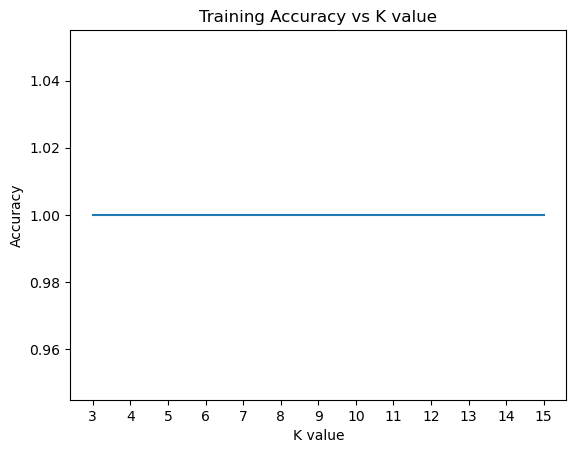

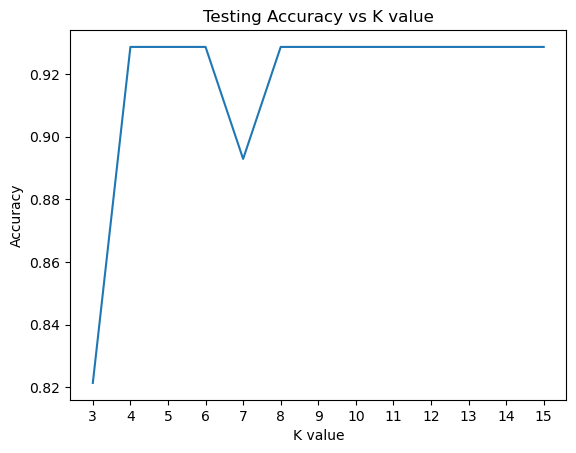

KNN best accuracy (Training): 100.00%
KNN best accuracy (Testing): 92.86%
The K-Nearest Neighbors (KNN) model has been trained successfully


In [82]:
# K-Nearest Neighbors (KNN) Parameters

# n_neighbors (Number of neighbors to use by default for kneighbors queries.)
# metric (Metric to use for distance computation.)
# n_jobs (The number of parallel jobs to run for neighbors search.)

# Initialize lists to store training and testing accuracies
scoreListknn_Train = []
scoreListknn_Test = []

# Iterate over different values of n_neighbors
for i in range(3, 16):
    # Create a KNN model with the different value of n_neighbors
    Model6 = KNeighborsClassifier(n_neighbors=i, weights='distance')
    
    # Fit the model on the training data
    Model6.fit(X_train, Y_train)
    
    # Calculate and store the training accuracy
    scoreListknn_Train.append(Model6.score(X_train, Y_train))
    
    # Calculate and store the testing accuracy
    scoreListknn_Test.append(Model6.score(X_test, Y_test))

# Plot the training accuracy for different values of n_neighbors
plt.plot(range(3, 16), scoreListknn_Train)
plt.xticks(np.arange(3, 16, 1))
plt.title("Training Accuracy vs K value")
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.show()

# Plot the testing accuracy for different values of n_neighbors
plt.plot(range(3, 16), scoreListknn_Test)
plt.xticks(np.arange(3, 16, 1))
plt.title("Testing Accuracy vs K value")
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.show()

# Find the maximum accuracy for both training and testing
KNN_Accuracy_Train = max(scoreListknn_Train) 
KNN_Accuracy_Test = max(scoreListknn_Test)

# Print the best accuracies achieved
print(f"KNN best accuracy (Training): {KNN_Accuracy_Train*100:.2f}%")
print(f"KNN best accuracy (Testing): {KNN_Accuracy_Test*100:.2f}%")

# Print a success message indicating that the model has been trained successfully
print(colored("The K-Nearest Neighbors (KNN) model has been trained successfully","green", attrs=['reverse']))

In [83]:
# Dictionary to store model names and their respective training scores (key:value)
model_train_scores = {
    "Model 1-Decision Tree Classifier": DT_Accuracy_Train,
    "Model 2-Random Forest Classifier": RF_Accuracy_Train,
    "Model 3-GaussianNB": GNB_Accuracy_Train,
    "Model 3-BernoulliNB": BNB_Accuracy_Train,
    "Model 4-Logistic Regression": LR_Accuracy_Train,
    "Model 5-Ridge Classifier CV": RCCV_Accuracy_Train,
    "Model 6-K-Nearest Neighbors (KNN)": KNN_Accuracy_Train
}

# Loop through each model and print the training score
for model_name, accuracy in model_train_scores.items():
    print(colored(f"{model_name:<50} Training Score: {accuracy*100}", "green"))

Model 1-Decision Tree Classifier                   Training Score: 100.0
Model 2-Random Forest Classifier                   Training Score: 100.0
Model 3-GaussianNB                                 Training Score: 79.62962962962963
Model 3-BernoulliNB                                Training Score: 80.55555555555556
Model 4-Logistic Regression                        Training Score: 80.55555555555556
Model 5-Ridge Classifier CV                        Training Score: 79.62962962962963
Model 6-K-Nearest Neighbors (KNN)                  Training Score: 100.0


In [84]:
# Dictionary to store model names and their respective testing scores
model_test_scores = {
    "Model 1-Decision Tree Classifier": DT_Accuracy_Test,
    "Model 2-Random Forest Classifier": RF_Accuracy_Test,
    "Model 3-GaussianNB": GNB_Accuracy_Test,
    "Model 3-BernoulliNB": BNB_Accuracy_Test,
    "Model 4-Logistic Regression": LR_Accuracy_Test,
    "Model 5-Ridge Classifier CV": RCCV_Accuracy_Test,
    "Model 6-K-Nearest Neighbors (KNN)": KNN_Accuracy_Test
}

# Loop through each model and print the testing score
for model_name, accuracy in model_test_scores.items():
    print(colored(f"{model_name:<50} Testing Score: {accuracy*100}", "green"))

Model 1-Decision Tree Classifier                   Testing Score: 96.42857142857143
Model 2-Random Forest Classifier                   Testing Score: 96.42857142857143
Model 3-GaussianNB                                 Testing Score: 89.28571428571429
Model 3-BernoulliNB                                Testing Score: 92.85714285714286
Model 4-Logistic Regression                        Testing Score: 96.42857142857143
Model 5-Ridge Classifier CV                        Testing Score: 92.85714285714286
Model 6-K-Nearest Neighbors (KNN)                  Testing Score: 92.85714285714286


In [87]:
## MODEL DEPLOYMENT 

import pickle

# File mode explanation:
# 'r'  - open for reading (default)
# 'w'  - open for writing, truncating the file first
# 'x'  - create a new file and open it for writing
# 'a'  - open for writing, appending to the end of the file if it exists
# 'b'  - binary mode
# 't'  - text mode (default)
# '+'  - open a disk file for updating (reading and writing)
# 'U'  - universal newline mode (deprecated)

# Define the filename for the pickle file
filename = 'model.pkl'

# Save (serialize) the model to the file using pickle
# 'wb' mode opens the file in binary format for writing
pickle.dump(Model2, open(filename, 'wb'))